In [2]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5,5)

In [3]:
G1 = nx.Graph()

In [4]:
G1.add_nodes_from(
    [
        1, 
        2, 
        3, 
        4],
    color = 'blue'
)

In [5]:
G1.add_edges_from(
    [
        (1, 2), 
        (2, 3), 
        (3, 4), 
        (4, 1),
        (1, 3)
    ]
)

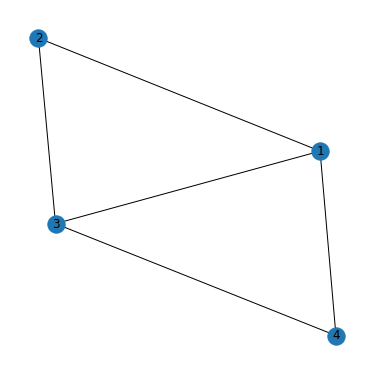

In [6]:
nx.draw(G1, with_labels=True)

In [7]:
G2 = nx.Graph()
G2.add_nodes_from(['a', 'b'])
G2.add_edges_from([('a','b')])

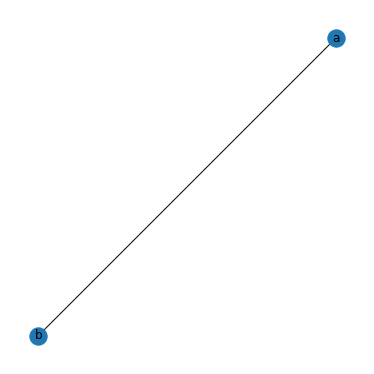

In [8]:
nx.draw(G2, with_labels=True)

In [9]:
GM = nx.algorithms.isomorphism.GraphMatcher(G1, G2)

In [10]:
GM.subgraph_is_isomorphic()

True

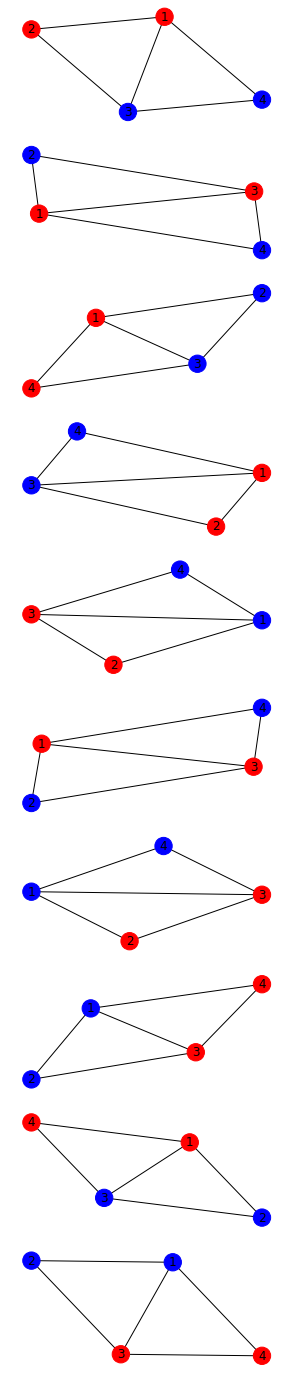

In [11]:
isomorphisms = [g for g in GM.subgraph_isomorphisms_iter()]
plt.rcParams["figure.figsize"] = (5,25)
for i, g in enumerate(isomorphisms):
    g1_iso_nodes = g.keys()
    for node in g1_iso_nodes:
        G1.nodes[node]['color'] = 'red'
    plt.subplot(len(isomorphisms), 1, i+1)
    nx.draw(G1, with_labels=True, node_color=[G1.nodes[i]['color'] for i in G1.nodes])
    for node in g1_iso_nodes:
        G1.nodes[node]['color'] = 'blue'
plt.rcParams["figure.figsize"] = (5,5)

In [12]:
isomorphisms_filtered = []

for i in range(len(isomorphisms)):
    for j in range(i+1,len(isomorphisms)):
        if isomorphisms[i].keys() == isomorphisms[j].keys():
            isomorphisms_filtered.append(isomorphisms[i])
            
isomorphisms_filtered

[{1: 'a', 2: 'b'},
 {1: 'a', 3: 'b'},
 {1: 'a', 4: 'b'},
 {2: 'a', 3: 'b'},
 {3: 'a', 4: 'b'}]

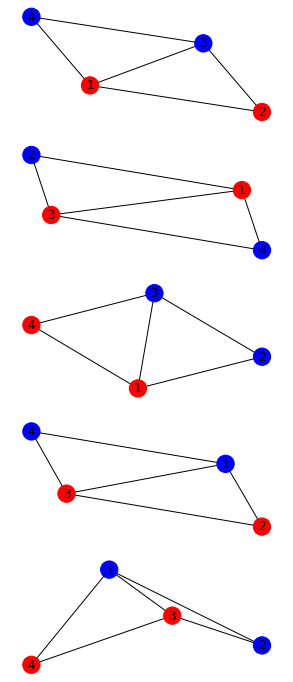

In [13]:
plt.rcParams["figure.figsize"] = (5,25)
for i, g in enumerate(isomorphisms_filtered):
    g1_iso_nodes = g.keys()
    for node in g1_iso_nodes:
        G1.nodes[node]['color'] = 'red'
    plt.subplot(len(isomorphisms), 1, i+1)
    nx.draw(G1, with_labels=True, node_color=[G1.nodes[i]['color'] for i in G1.nodes])
    for node in g1_iso_nodes:
        G1.nodes[node]['color'] = 'blue'
plt.rcParams["figure.figsize"] = (5,5)

In [1]:
from typing import Dict, List
import networkx as nx

def find_isomorphisms(G_main: nx.Graph, G_to_find: nx.Graph, filter_duplicates=True) -> List[Dict]:
	GM = nx.algorithms.isomorphism.GraphMatcher(G_main, G_to_find)
	
	if not GM.subgraph_is_isomorphic():
		return []
	
	isomorphisms = list(GM.subgraph_isomorphisms_iter())
	
	if filter_duplicates:
		isomorphisms_filtered = []
		for i in range(len(isomorphisms)):
			for j in range(i+1,len(isomorphisms)):
				if isomorphisms[i].keys() == isomorphisms[j].keys():
					isomorphisms_filtered.append(isomorphisms[i])
		
		isomorphisms = isomorphisms_filtered
		
	return isomorphisms

In [14]:
find_isomorphisms(G1, G2)

[{1: 'a', 2: 'b'},
 {1: 'a', 3: 'b'},
 {1: 'a', 4: 'b'},
 {2: 'a', 3: 'b'},
 {3: 'a', 4: 'b'}]